In [1]:
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import torch

In [2]:
X=torch.linspace(1.0,50.0,50).reshape(-1,1)
E=torch.randint(-8,9,(50,1))

In [3]:
Y=2*X+1+E

In [4]:
x=X.numpy()
y=Y.numpy()

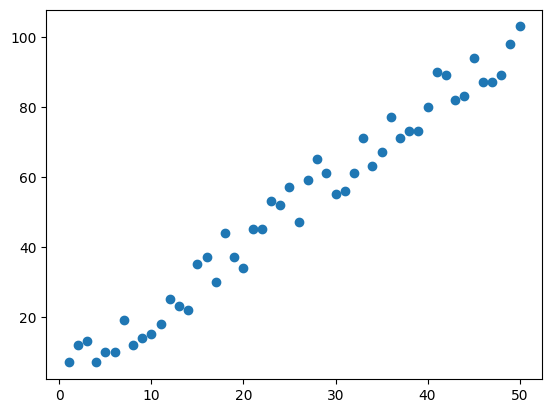

In [5]:
plt.scatter(x,y)

In [6]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)
    def forward(self,X):
        Y_predicted=self.linear(X)
        return Y_predicted

In [7]:
model=Model(1,1)

In [9]:
criterion =nn.MSELoss()

In [10]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [11]:
epochs=50
losses=[]

In [12]:
for i in range(epochs):
    Y_predicted=model.forward(X)
    loss=criterion(Y_predicted,Y)
    losses.append(loss)    #loss.item() ,to get numerical value from tensor
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [13]:
num_losses=[i.tolist() for i in losses]

Text(0.5, 0, 'epochs')

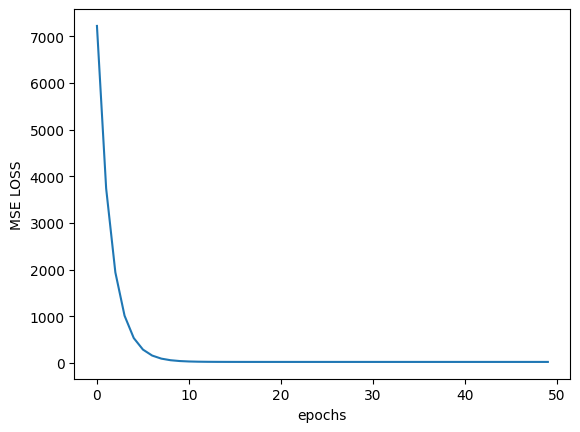

In [14]:
plt.plot(range(epochs),num_losses)
plt.ylabel('MSE LOSS')
plt.xlabel('epochs')

In [15]:
x=np.linspace(0,50.0,50)
current_weight=model.linear.weight.item()
current_bias=model.linear.bias.item()


In [16]:
y_predicted=current_weight*x +current_bias

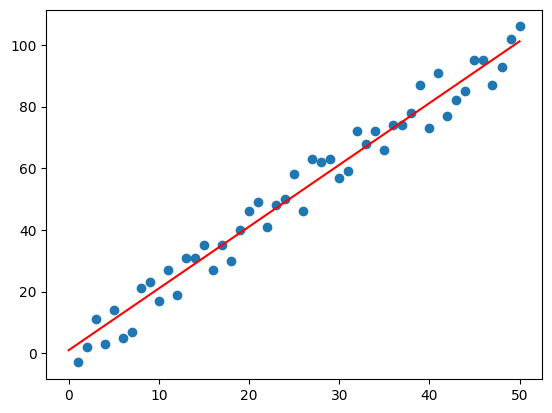

In [16]:
plt.scatter(X.numpy(),Y.numpy())
plt.plot(x,y_predicted,'r')